In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime


In [ ]:
%pip install calmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import calmap

In [ ]:
from wordcloud import WordCloud
import altair as alt

# Importing Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Personal Projects/Pak Election Prediction/data/tweets_dataset_final.csv')
df.head()

,User,Date Created,Source,Tweet,Retweets,Likes,sentim,cleaned_tweets
0,MEDICOSEFEVER,12/30/2022,Twitter for Android,Past politics experience can bring prosperity ...,0.0,0.0,-1,past politics experience can bring prosperity ...
1,Zeenat84065967,12/30/2022,Twitter for Android,A comprehensive analysis of Arshad Bhatti by t...,0.0,0.0,1,a comprehensive analysis of arshad bhatti by t...
2,linkarif,12/30/2022,Twitter for iPhone,"@OfficialDGISPR Stop playing dirty politics, i...",0.0,0.0,1,officialdgispr stop playing dirty politics it ...
3,News_Pakistan10,12/30/2022,Twitter Web App,See Donald Trump's tax returns | CNN Politics\...,0.0,0.0,0,see donald trumps tax return cnn politics
4,DunyaNews,12/30/2022,DunyaTV,Four members of Balochistan join the People's ...,14.0,181.0,1,four member of balochistan join the peoples party


# Data Cleaning

Since the sentiment expressed by the public does not require the username and uncleaned tweets, we will remove them as a whole to reduce unnecessary noise from our data

In [ ]:
df.drop(['User', 'Tweet'], axis = 1 , inplace = True)
df.head()

,Date Created,Source,Retweets,Likes,sentim,cleaned_tweets
0,12/30/2022,Twitter for Android,0.0,0.0,-1,past politics experience can bring prosperity ...
1,12/30/2022,Twitter for Android,0.0,0.0,1,a comprehensive analysis of arshad bhatti by t...
2,12/30/2022,Twitter for iPhone,0.0,0.0,1,officialdgispr stop playing dirty politics it ...
3,12/30/2022,Twitter Web App,0.0,0.0,0,see donald trumps tax return cnn politics
4,12/30/2022,DunyaTV,14.0,181.0,1,four member of balochistan join the peoples party


In [ ]:
df.sentim = df.sentim.astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69071 entries, 0 to 69070
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date Created    69071 non-null  object 
 1   Source          69071 non-null  object 
 2   Retweets        69071 non-null  float64
 3   Likes           69071 non-null  float64
 4   sentim          69071 non-null  object 
 5   cleaned_tweets  69071 non-null  object 
dtypes: float64(2), object(4)
memory usage: 3.2+ MB


There are no more null values and only those columns remain which we require for our analysis. The main objective of our analysis is going to have the following roadmap:

1. Overall Sentiment of the Public
2. Sentiment Dependant on time frame i.e. every 2 month bracket
3. Integrating the likes and retweets in the overall sentment scores since these are from people who hold a similar opinion.
4. Sentiment from different sources like Iphones, Androids, News Casters etc.

# Overall Public Sentiment

In [ ]:
plt.rc('figure', figsize=(10, 10))

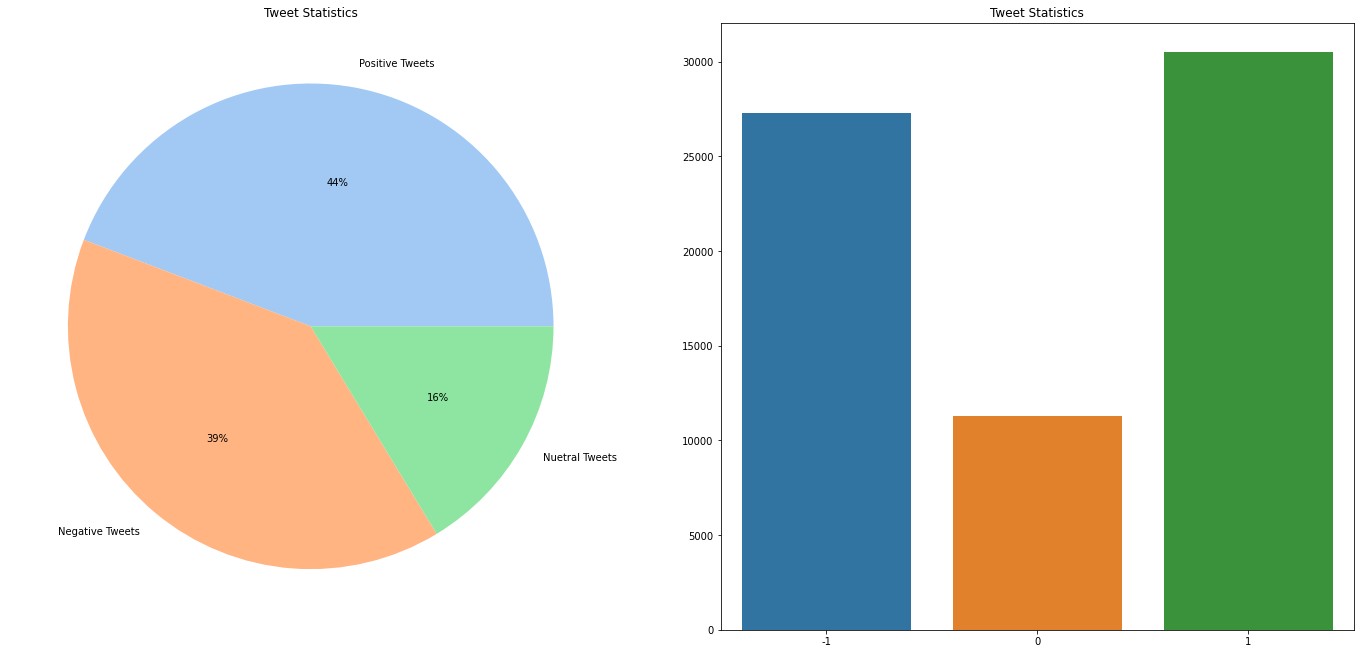

In [ ]:
plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.pie(df.sentim.value_counts(), labels = ['Positive Tweets', 'Negative Tweets', 'Nuetral Tweets'], colors = sns.color_palette('pastel')[0:3], autopct='%.0f%%')
plt.title('Tweet Statistics')

plt.subplot(1, 2, 2)
sns.barplot(x = [1,-1,0],
            y = list(df.sentim.value_counts()),
            data = df )
plt.title('Tweet Statistics')

# space between the plots
plt.tight_layout(4)

plt.show()

Lets visualize the most popular words in each category of tweets.

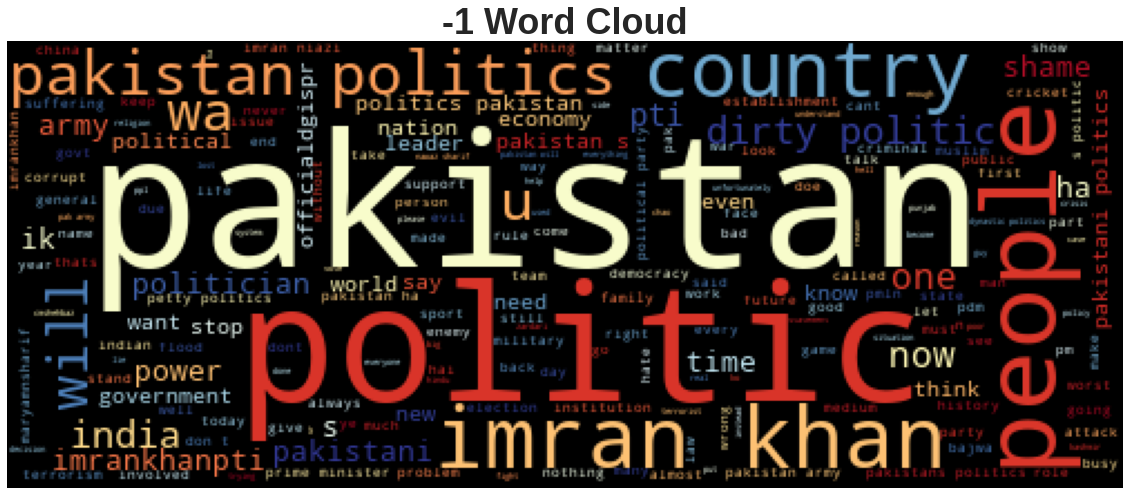

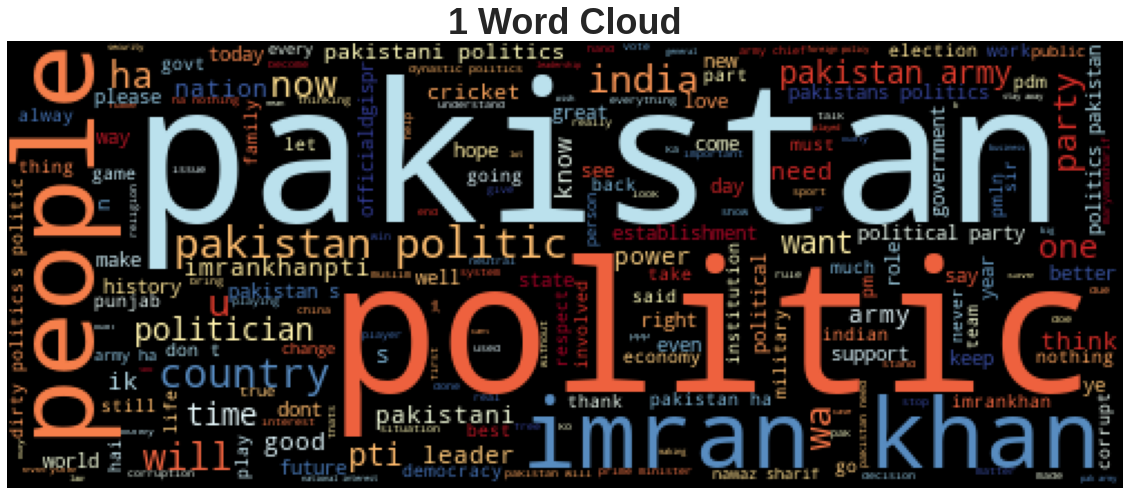

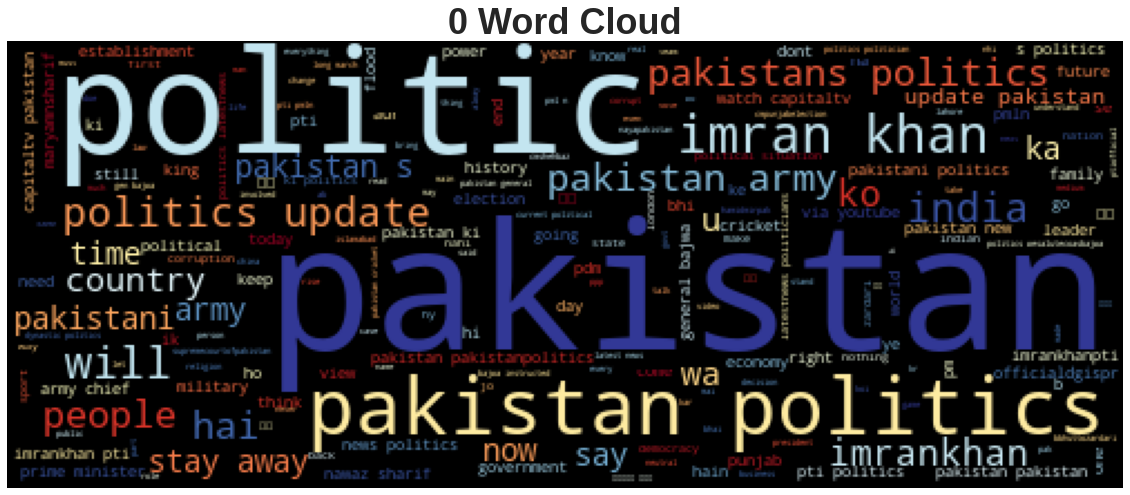

In [ ]:
### This Word Cloud Code snippet source is https://python.plainenglish.io/word-clouds-with-python-12b53954e27d

plt.style.use('seaborn-whitegrid')
import matplotlib as mpl

# Set wordcloud size
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# Define a wordcloud function
def wordcloud(text, title=""):
    
    # Create word cloud
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    
    # Display word cloud
    plt.imshow(df_cloud)
    
    # Remove axis
    plt.axis("off")
    
    # Update fint dictionary
    fontdict = {"fontsize": 36, "fontweight" : "bold"}
    
    # Set wordcloud title
    plt.title(title, fontdict=fontdict)
    
    # Show word cloud
    plt.show()
    
# Generate word clouds for each Medium publication on the data frame
for sentiment in df["sentim"].unique():
    wordcloud(df[df["sentim"]==sentiment].cleaned_tweets.str.cat(sep=" "), title= f"{sentiment} Word Cloud")

The above word clouds don't seem to be very intuitive and give a general direction towards the most common words associated with each which seemingly are quite similar. This would be understandable since we scrapped the data using the heading 'Pakistan Politics'. However, it might be prudent to remove these two words since they do not give a lot of information.

# Sentiment by Time Frame

We will be analyzing the tweets based on the different time frames and then correlating them with some of the major events that may have taken place during those times to determine that may have caused extreme hikes in any of the series. For this to be more accurate, let us divide the data into different time frames like months, weeks and days.

In [ ]:
df['Date Created']= pd.to_datetime(df['Date Created'])

In [ ]:
df['month'] = df['Date Created'].dt.month
df['week_day'] = df['Date Created'].dt.day_name()

In [ ]:
df.head()

,Date Created,Source,Retweets,Likes,sentim,cleaned_tweets,month,week_day
0,2022-12-30,Twitter for Android,0.0,0.0,-1,past politics experience can bring prosperity ...,12,Friday
1,2022-12-30,Twitter for Android,0.0,0.0,1,a comprehensive analysis of arshad bhatti by t...,12,Friday
2,2022-12-30,Twitter for iPhone,0.0,0.0,1,officialdgispr stop playing dirty politics it ...,12,Friday
3,2022-12-30,Twitter Web App,0.0,0.0,0,see donald trumps tax return cnn politics,12,Friday
4,2022-12-30,DunyaTV,14.0,181.0,1,four member of balochistan join the peoples party,12,Friday


In [ ]:
df.sentim = df.sentim.astype(int)
df1 = df.groupby('Date Created', as_index=False)['sentim'].mean()

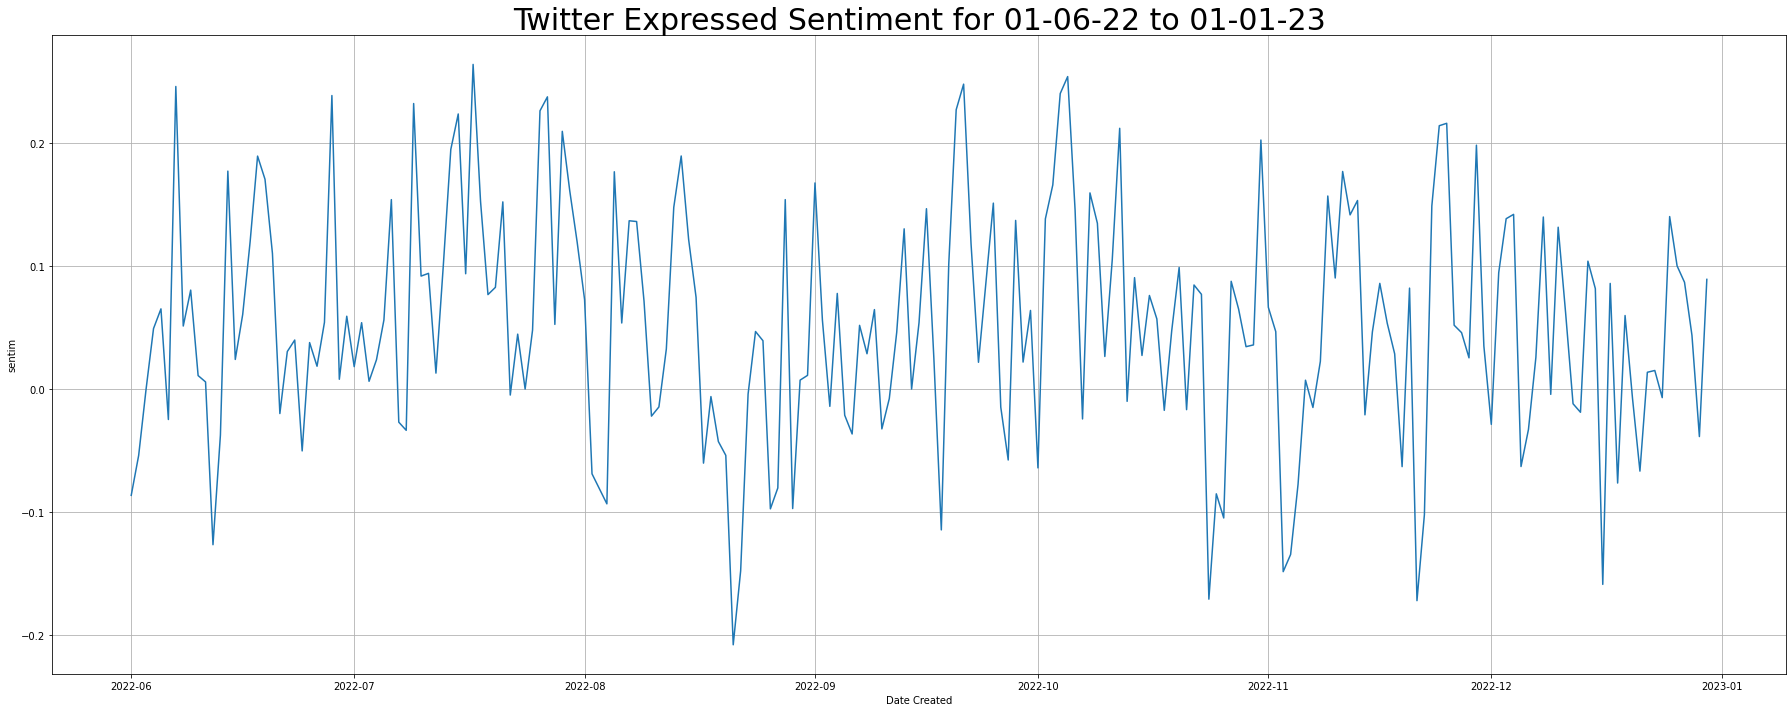

In [ ]:
plt.rc('figure', figsize=(25, 10))
plt.rcParams["figure.autolayout"] = True
sns.lineplot(x="Date Created", y='sentim', data=df1)
plt.grid(True, alpha=1)
plt.title('Twitter Expressed Sentiment for 01-06-22 to 01-01-23' , fontdict={'fontsize': 30})
plt.show()

In [ ]:
# https://towardsdatascience.com/create-githubs-style-contributions-plot-for-your-time-series-data-79df84ec93da
df_aug = df[['month' , 'week_day', 'sentim']]
df_aug_pivot = pd.pivot_table(df_aug , values = 'sentim' , index = ['week_day'], columns = ['month'], aggfunc = np.mean)

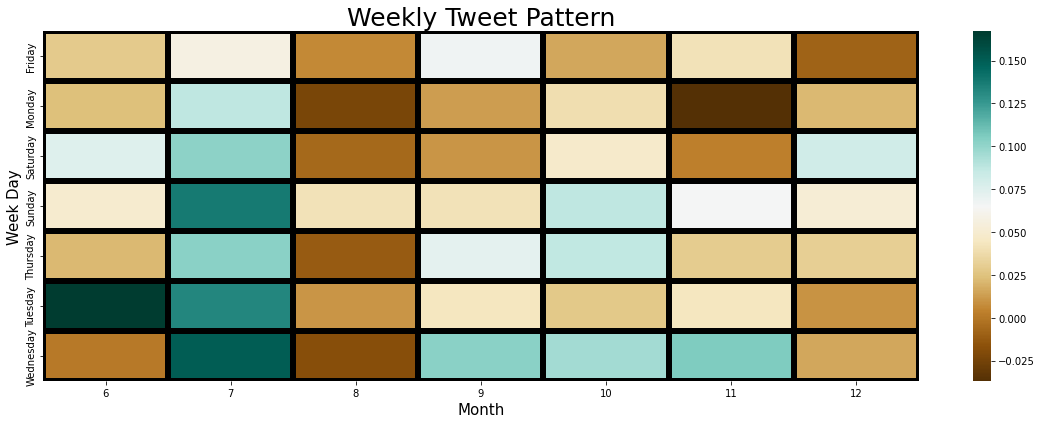

In [ ]:
plt.figure(figsize = (16,6))
sns.heatmap(df_aug_pivot , linewidth = 5 , cmap = 'BrBG', linecolor = 'black' , square = False)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Week Day', fontsize = 15)
plt.title('Weekly Tweet Pattern', fontsize = 25)
plt.show()

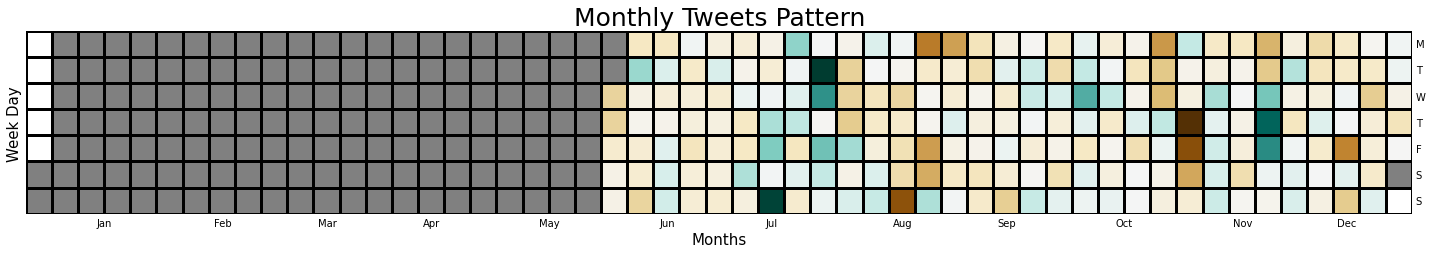

In [ ]:
# https://pythonhosted.org/calmap/
df_month = df.set_index('Date Created')

plt.figure(figsize = (20,20))
calmap.yearplot(df_month['sentim'] , cmap = 'BrBG', linecolor = 'black' , fillcolor = 'grey', daylabels = 'MTWTFSS', linewidth = 2)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Week Day', fontsize = 15)
plt.title('Monthly Tweets Pattern', fontsize = 25)
plt.show()